In [1]:
import matplotlib.pyplot as plt
import numpy as np
import time
import csv
import pdb
import json
from IPython.display import display, clear_output

In [5]:
def update_plots(new_data):
	# Example: Assume new_data is a dictionary with new points for each dataset
	add_point(lines["win_pct"], new_data["games"], new_data["win_pct"])
	add_point(lines["boot_avg"], new_data["games"], new_data["boot_avg"])
	add_point(lines["boot_ver"], new_data["games"], new_data["boot_ver"])
	add_point(lines["cost_hist"], new_data["games"], new_data["cost_hist"])
	add_point(lines["max_hist0"], new_data["games"], new_data["max_hist0"])
	add_point(lines["max_hist1"], new_data["games"], new_data["max_hist1"])
	add_point(lines["max_hist2"], new_data["games"], new_data["max_hist2"])
	add_point(lines["max_hist3"], new_data["games"], new_data["max_hist3"])
	add_point(lines["max_hist4"], new_data["games"], new_data["max_hist4"])
	add_point(lines["min_hist0"], new_data["games"], new_data["min_hist0"])
	add_point(lines["min_hist1"], new_data["games"], new_data["min_hist1"])
	add_point(lines["min_hist2"], new_data["games"], new_data["min_hist2"])
	add_point(lines["min_hist3"], new_data["games"], new_data["min_hist3"])
	add_point(lines["min_hist4"], new_data["games"], new_data["min_hist4"])

	# Update plot limits and redraw
	for ax in [ax1, ax2, ax3, ax4, ax5]:
		ax.relim()
		ax.autoscale_view()

	plt.draw()
	plt.pause(0.001)


In [6]:
def save_plots(filename):
	"""
	Save the current plot data to a file.
	"""
	plot_data = {}
	for name, line in lines.items():
		try:
			# Convert NumPy arrays to lists explicitly
			x_data = line.get_xdata()
			y_data = line.get_ydata()
			
			if isinstance(x_data, np.ndarray):
				x_data = x_data.tolist()
			if isinstance(y_data, np.ndarray):
				y_data = y_data.tolist()

			plot_data[name] = {
				"x": x_data,
				"y": y_data
			}
		except Exception as e:
			print(f"Error processing line '{name}': {e}")
			continue

	try:
		with open(filename, 'w') as f:
			json.dump(plot_data, f)
		print(f"Plots saved to {filename}")
	except Exception as e:
		print(f"Error saving plots to {filename}: {e}")

In [2]:
def load_plots(filename):
    """
    Load plot data from a file and update the lines.
    """
    global lines
    try:
        with open(filename, 'r') as f:
            plot_data = json.load(f)
    except Exception as e:
        print(f"Error loading file '{filename}': {e}")
        return
    
    for name, data in plot_data.items():
        if name in lines:
            try:
                lines[name].set_xdata(data["x"])
                lines[name].set_ydata(data["y"])
            except Exception as e:
                print(f"Error updating line '{name}': {e}")
        else:
            print(f"Warning: Line {name} not found in the current plot.")
    
    # Update plot limits and redraw
    for ax in [ax1, ax2, ax3, ax4, ax5]:
        ax.relim()
        ax.autoscale_view()
    
    plt.draw()

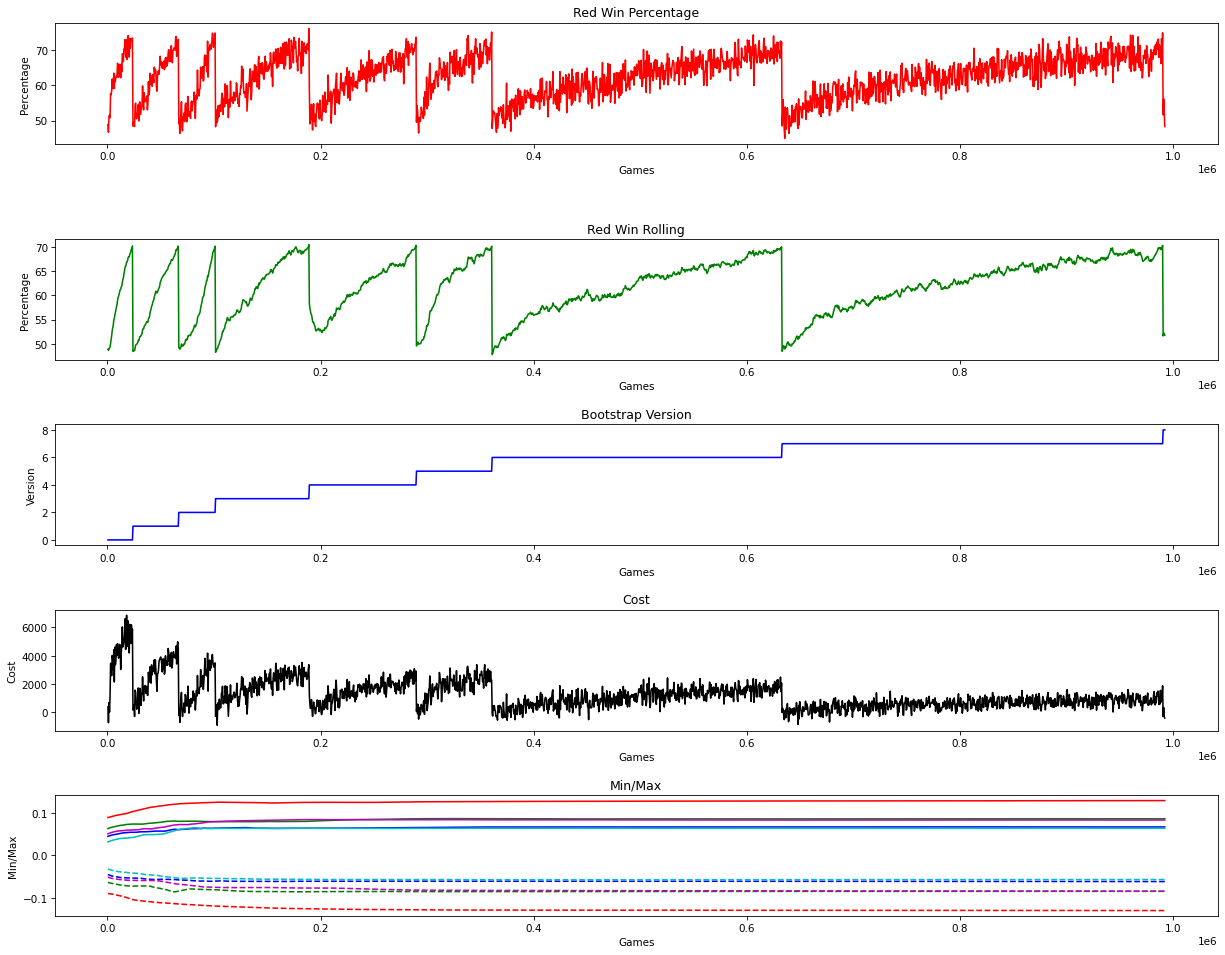

In [3]:
%matplotlib inline
plt.figure(1, dpi=75, figsize=(20,16))
ax1 = plt.subplot2grid((60, 2), (0, 0), colspan=2, rowspan=8)
ax2 = plt.subplot2grid((60, 2), (14, 0), colspan=2, rowspan=8)
ax3 = plt.subplot2grid((60, 2), (26, 0), colspan=2, rowspan=8)
ax4 = plt.subplot2grid((60, 2), (38, 0), colspan=2, rowspan=8)
ax5 = plt.subplot2grid((60, 2), (50, 0), colspan=2, rowspan=8)
#ax1.set_title('Win Percentage')
#ax1.set_xlabel('Games')
#ax1.set_ylabel('Percentage')
ax1.set_title('Red Win Percentage')
ax1.set_xlabel('Games')
ax1.set_ylabel('Percentage')
ax2.set_title('Red Win Rolling')
ax2.set_xlabel('Games')
ax2.set_ylabel('Percentage')
ax3.set_title('Bootstrap Version')
ax3.set_xlabel('Games')
ax3.set_ylabel('Version')
ax4.set_title('Cost')
ax4.set_xlabel('Games')
ax4.set_ylabel('Cost')
ax5.set_title('Min/Max')
ax5.set_xlabel('Games')
ax5.set_ylabel('Min/Max')
lines = {
    "win_pct": ax1.plot([], [], 'r-')[0],
    "boot_avg": ax2.plot([], [], 'g-')[0],
    "boot_ver": ax3.plot([], [], 'b-')[0],
    "cost_hist": ax4.plot([], [], 'k-')[0],
    "max_hist0": ax5.plot([], [], 'r-')[0],
    "max_hist1": ax5.plot([], [], 'g-')[0],
    "max_hist2": ax5.plot([], [], 'b-')[0],
    "max_hist3": ax5.plot([], [], 'c-')[0],
    "max_hist4": ax5.plot([], [], 'm-')[0],
    "min_hist0": ax5.plot([], [], 'r--')[0],
    "min_hist1": ax5.plot([], [], 'g--')[0],
    "min_hist2": ax5.plot([], [], 'b--')[0],
    "min_hist3": ax5.plot([], [], 'c--')[0],
    "min_hist4": ax5.plot([], [], 'm--')[0]
}	

load_plots("PT.json")


In [8]:
move = np.array([0, 0, 1, 0, 0, 0, 0, 0])

In [9]:
np.argmax(move)

2